 0.Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import random

1. Import the data

Before importing this data, we watch in the form of csv table. We find that the first column is exactly the number of rows. When importing these data, we only keep the data from the second column to the last column.

In [2]:
%matplotlib inline

df = pd.read_csv('avocado.csv').iloc[:, 1:]

df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Data Description: 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailer's cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table. Here, type is a categorical variable.

(1) Date: the data of the observation

(2) AveragePrice: the average price of a single avocado

(3) TotalVolume: Total number of avocados sold

(4) 4046: Total number of avocados with PLU 4046 sold

(5) 4225: Total number of avocados with PLU 4225 sold

(6) 4770: Total number of avocados with PLU 4770 sold

(7) Total Bags: Total number of bags (in millions)

(8) Small Bags: Number of small bags (in millions)

(9) Large Bags: Number of large bags (in millions)

(10) XLarge Bags: Number of extra large bags (in millions)

(11) Type: Type of avocados: conventional or organic

(12) year: the year of the observation

(13) region: the city or region of the observations

In [3]:
df.count()

Date            18249
AveragePrice    18249
Total Volume    18249
4046            18249
4225            18249
4770            18249
Total Bags      18249
Small Bags      18249
Large Bags      18249
XLarge Bags     18249
type            18249
year            18249
region          18249
dtype: int64

In [4]:
df['region'].value_counts()

LasVegas               338
BuffaloRochester       338
RichmondNorfolk        338
Atlanta                338
Charlotte              338
LosAngeles             338
Pittsburgh             338
Columbus               338
Orlando                338
Louisville             338
Jacksonville           338
Seattle                338
Detroit                338
NorthernNewEngland     338
SouthCarolina          338
Plains                 338
PhoenixTucson          338
Spokane                338
TotalUS                338
Philadelphia           338
NewOrleansMobile       338
HartfordSpringfield    338
Boston                 338
Midsouth               338
Syracuse               338
Chicago                338
NewYork                338
Southeast              338
Portland               338
Albany                 338
Northeast              338
Denver                 338
Houston                338
Sacramento             338
SanDiego               338
West                   338
HarrisburgScranton     338
C

In [5]:
len(df["region"].unique())

54

In [6]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [7]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

The total number of this dataset is 18249. There are no missing values in this dataset. We investigate the sales of avocados around 4-year period of time and among 54 different regions in the United States. The regions are located on most of the states in the US. The data on the conventional and organic types are close, so as to compare the sales between these two different types.

# Analysis, Modeling, Visualization:

To avoid contaminating the raw data, we copied and worked on the dataframe df_temp.

In [8]:
df_temp = df.copy(deep=True)

(1) For different types of avocados, how was the sales in different regions ? 

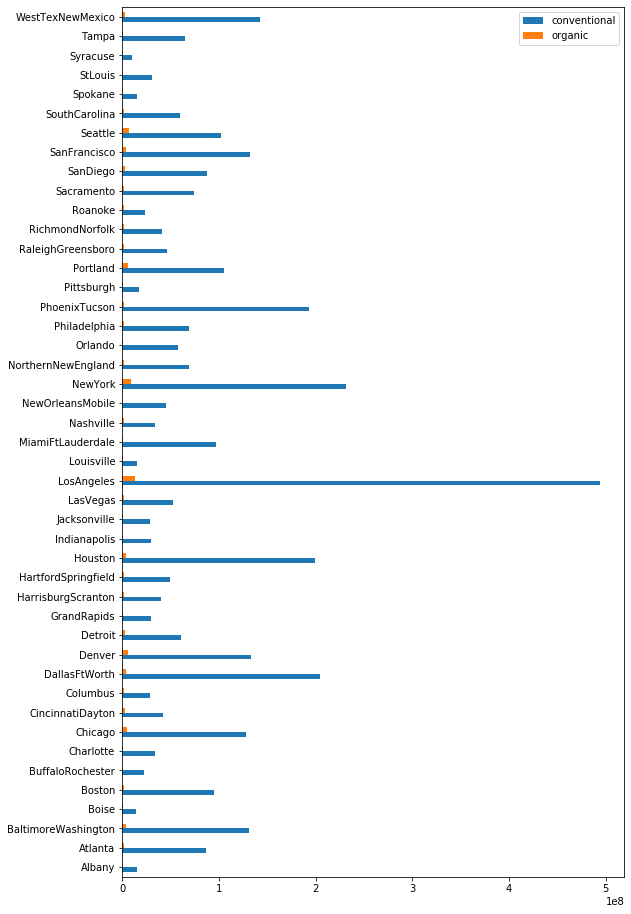

In [9]:
lst = ["TotalUS","West","Midsouth", "SouthCentral","Plains", "Northeast","Southeast","California", "GreatLakes"]

# Compute the total volume of conventional type and summarize by region
df1 = df_temp[(df_temp["type"]=="conventional") &(df_temp["region"].isin(lst)==False)]
df1 = df1[["region", "Total Volume"]]
df1 = df1.groupby("region").sum()

# Compute the total volume of organic type and summarize by region
df2 = df_temp[(df_temp["type"]=="organic") &(df_temp["region"].isin(lst)==False)]
df2 = df2[["region", "Total Volume"]]
df2 = df2.groupby("region").sum()

df1 = df1.rename(columns={"Total Volume": "Total Volume conventional"})
df2 = df2.rename(columns={"Total Volume": "Total Volume organic"})
frames = [df1, df2]
result = pd.concat(frames,axis = 1)
result = result.reset_index()
col1 = result["region"].to_numpy()
col2 = result["Total Volume conventional"].to_numpy()
col3 = result["Total Volume organic"].to_numpy()
mat = pd.DataFrame({'conventional': col2,'organic': col3}, index=col1)
ax = mat.plot.barh(rot=0, figsize=(9,16))

From the plot above, we eliminate all information related with regions. We focus on the total volume on different cities. We have a barchat on the total volume of conventional and organic avocadoes. The vertical axis is the region and the horizonal axis is the number of total volume computed from the data.

It is clear that the total volume is proportional to the population in this cities, such as Los Angeles in the west coast and New York in the east coast. The sum illustrated in this barchat comes from the data from 3 years. Again, the total volume in the middle of the United States is much less than the east or west coast region. This may be becasue the transportation limits.

Compared with two types of avocadoes, the demand for the conventional is around 5 times higher than the demand for the organic in some cities. The ratio between the demand for these two types will be higher in some cities.

From the producers' perspective, we analyze the total volume of demands and we can focus more on the markets in both coast regions. If the weather condition and cost condition satisfy, we can consider to build more areas to plant the avocadoes close to both coast, which will cut the huge cost on the transportation. We can decrease to cultivate the organic avocadoes to make a balance between the demand and supply.

(2) Fix one region such as totalUS and consider the conventional type, which Product Lookup codes (PLU) is highly recommended ? 

In [10]:
data1 = df_temp[(df["region"]=="TotalUS")&(df["type"]=="conventional")]
data1 = data1[["4046","4225","4770"]].to_numpy()
# find the column sum
data1 = np.sum(data1,0)
total = sum(data1)
prop = data1/total

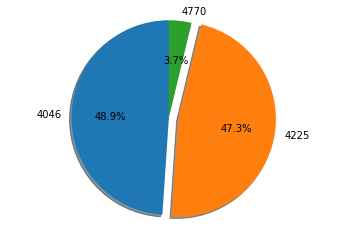

In [11]:
labels = "4046","4225","4770"
explode = (0, 0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(prop, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

We worked on the data of volume for three different Product Lookup codes (PLU). We take the sum of each PLU, which represents three different products, considering the numbers among the United States. It is clear that product 4046 and product 4225 occupy most of capacities of avocado markets. Product 4770 is only 3.7 percent of the markets. The consumers are more likely to buy product 4046 and 4225 rather than product 4770. This implies that we can improve the productivity of these avocados to get more revenues from the retail.

(3) Based on this dataset, determine the factor which influence on the average price.

With the basic relationship between demand and supply, we proposal to build a model on the average price of avocados and total number of different products sold in total US. We first plot some scatter plots to see the trend of these variables. Here, we only work on the conventional type of avocados.

In [12]:
data2 = df_temp[(df["region"]=="TotalUS")&(df["type"]=="conventional")]
data2 = data2[["AveragePrice","4046","4225","4770"]]
data2 = data2.reset_index()
data2 = data2.drop(columns=["index"])

Since the total number sold of these three products are much larger than the average price and these numbers have different magnitude with the price, we work on the scale data. Avoid the negative value in the column and we consider the min-max procedure.

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(data2[["4046","4225","4770"]].values.astype(float))
df_normalized = pd.DataFrame(scaled_array)
df_normalized = pd.concat([data2["AveragePrice"],df_normalized],axis = 1)
df_normalized = df_normalized.rename(columns={0: "n_4046", 1:"n_4225",2:"n_4770"})
df_normalized.head()

,AveragePrice,n_4046,n_4225,n_4770
0,0.95,0.165771,0.245683,0.381416
1,0.98,0.107457,0.181944,0.388991
2,0.93,0.180282,0.290325,0.305040
3,0.89,0.151687,0.389821,0.266741
4,0.99,0.068329,0.157956,0.175540


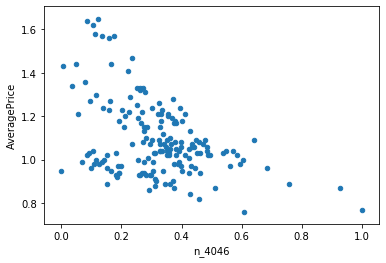

In [14]:
df_normalized.plot.scatter(x="n_4046", y="AveragePrice")

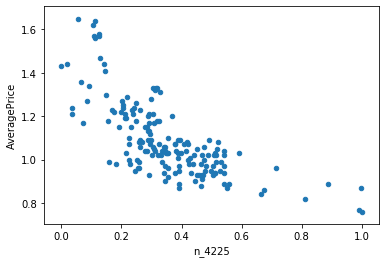

In [15]:
df_normalized.plot.scatter(x="n_4225", y="AveragePrice")

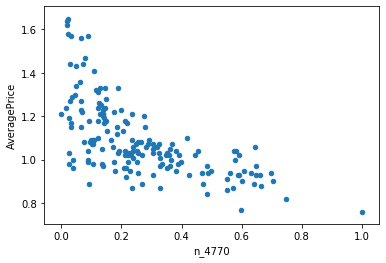

In [16]:
df_normalized.plot.scatter(x="n_4770", y="AveragePrice")

Based on the scatter plot, we find some relationship between the average price and number sold of different products.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_normalized[["n_4046","n_4225","n_4770"]],
                                                    df_normalized["AveragePrice"], 
                                                    test_size=0.05,
                                                    random_state= 9326)
lm = LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [18]:
coeff_df = pd.DataFrame(lm.coef_, ["n_4046","n_4225","n_4770"], columns=['Coefficient'])  
coeff_df

,Coefficient
n_4046,-0.088592
n_4225,-0.457777
n_4770,-0.273697


In [19]:
print(r2_score(y_test, y_pred))

0.9565341874944513


In [20]:
print(mean_squared_error(y_test, y_pred))

0.00045215177305154745


We split the data into two parts. 95 percent of training data and 5 percent of test data. We fit the data into a multiple linear regression model. The coefficient of these normalized data for each product is listed above. $R^2$ is 0.95, which means the model fits well. We also compute the mean squared error which is aroung $4\times10^{-3}$. From this model, we can predict the average price of avocado given the total volume of each product. 

From the retailers' perspective, we could also determine the average price of avocados. Based on the predicted volume and this multiple linear regression model, we will have a predicted average price. Based on this predicted value, if we can determine the actual price on this information. If we have a little price premium on this predicted value, as a result, we will receive more revenue.

# Reference:
[1] Hass Avocado Board, http://www.hassavocadoboard.com/retail/volume-and-price-data